In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as md
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

In [2]:
import matplotlib.font_manager as fm

# print([font.name for font in fm.fontManager.ttflist])

In [3]:
plt.rc("font", family = "AppleGothic")
sns.set(font="AppleGothic", 
rc={"axes.unicode_minus":False}, style='white')
# sns.set(font="AppleGothic", 
# rc={"axes.unicode_minus":False})
# sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# 2017년 한해 매출, 주문 건수 트렌드 파악

In [4]:
cnt_orders_2017 = pd.read_csv('../data/order_purchase_freq_2017.csv')

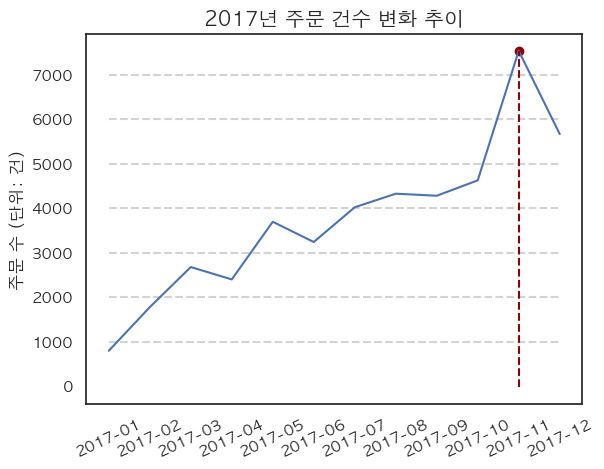

In [5]:
# backgrounds
for i in range(1000, 8000, 1000):
    plt.hlines(i, 0, 11, linestyles='--', color='lightgray')
    
# main graph
orders_trend_2017_lineplot = sns.lineplot(data=cnt_orders_2017, x ='order_purchase_year_month', y='cnt_orders')
orders_trend_2017_lineplot.set_title('2017년 주문 건수 변화 추이', fontdict={'size':'large'})
orders_trend_2017_lineplot.set_xlabel('')
orders_trend_2017_lineplot.set_ylabel('주문 수 (단위: 건)')
plt.xticks(rotation=25)
# orders_trend_2017_lineplot.set_xticklabels(rotation=30)


plt.scatter(x = cnt_orders_2017.iloc[10,0], y = cnt_orders_2017.iloc[10,1], color='darkred')
plt.vlines(cnt_orders_2017.iloc[10,0], -10, cnt_orders_2017.iloc[10,1], linestyle='--', color ='darkred')
plt.show()


In [6]:
cnt_orders_2017.describe()

,cnt_orders
count,12.000000
mean,3758.416667
std,1792.938242
min,800.000000
25%,2612.500000
50%,3863.000000
75%,4406.000000
max,7544.000000


In [15]:
cnt_orders_2017.iloc[10, :]

order_purchase_year_month    2017-11
cnt_orders                      7544
Name: 10, dtype: object

In [7]:
sales_trend_2017 = pd.read_csv('../data/sales_trend_2017.csv')

In [8]:
sales_trend_2017.head()

,order_purchase_year_month,total_payments
0,2017-01,138488.04
1,2017-02,291908.01
2,2017-03,449863.60
3,2017-04,417788.03
4,2017-05,592918.82


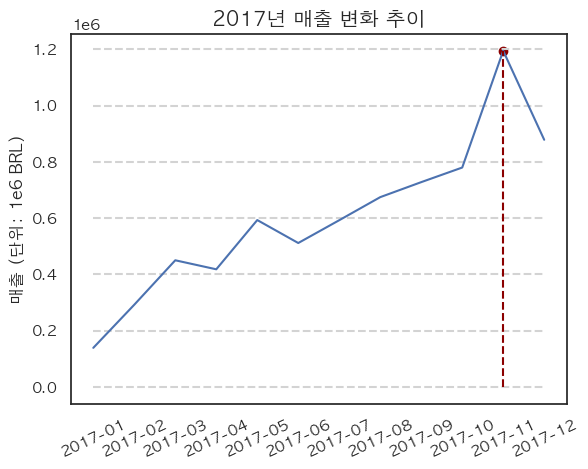

In [26]:
# backgrounds
for i in np.arange(0, 1.3e6, 2e5):
    plt.hlines(i, 0, 11, linestyles='--', color='lightgray')
    
# main graph
sales_trend_2017_lineplot = sns.lineplot(data=sales_trend_2017, x ='order_purchase_year_month', y='total_payments')
sales_trend_2017_lineplot.set_title('2017년 매출 변화 추이', fontdict={'size':'large'})
sales_trend_2017_lineplot.set_xlabel('')
sales_trend_2017_lineplot.set_ylabel('매출 (단위: 1e6 BRL)') # BRL: 브라질 헤알
plt.xticks(rotation=25)
# orders_trend_2017_lineplot.set_xticklabels(rotation=30)


plt.scatter(x = sales_trend_2017.iloc[10,0], y = sales_trend_2017.iloc[10,1], color='darkred')
plt.vlines(sales_trend_2017.iloc[10,0], -10, sales_trend_2017.iloc[10,1], linestyle='--', color ='darkred')
plt.show()


In [16]:
sales_trend_2017.describe()

,total_payments
count,1.200000e+01
mean,6.041456e+05
std,2.791163e+05
min,1.384880e+05
25%,4.418447e+05
50%,5.926509e+05
75%,7.407413e+05
max,1.194883e+06


In [17]:
sales_trend_2017.iloc[10, :]

order_purchase_year_month      2017-11
total_payments               1194882.8
Name: 10, dtype: object

# 2017년 11월 매출, 주문 건수 트렌드 파악

In [10]:
cnt_orders_2017_11 = pd.read_csv('../data/order_cnt_2017_one_year.csv')
cnt_orders_2017_11['order_purchase_date'] = pd.to_datetime(cnt_orders_2017_11['order_purchase_date'], format = '%Y-%m-%d')
print(cnt_orders_2017_11.head())

  order_purchase_date  cnt_orders
0          2017-11-01         111
1          2017-11-02         124
2          2017-11-03         143
3          2017-11-04         111
4          2017-11-05         144


references
- [stackoverflow - Lowering the x axis value density for dates on a seaborn line plot](https://stackoverflow.com/questions/63218645/lowering-the-x-axis-value-density-for-dates-on-a-seaborn-line-plot
- [Adding an arbitrary line to a matplotlib plot with datetimes on x axis](https://stackoverflow.com/questions/46423224/adding-an-arbitrary-line-to-a-matplotlib-plot-with-datetimes-on-x-axis)

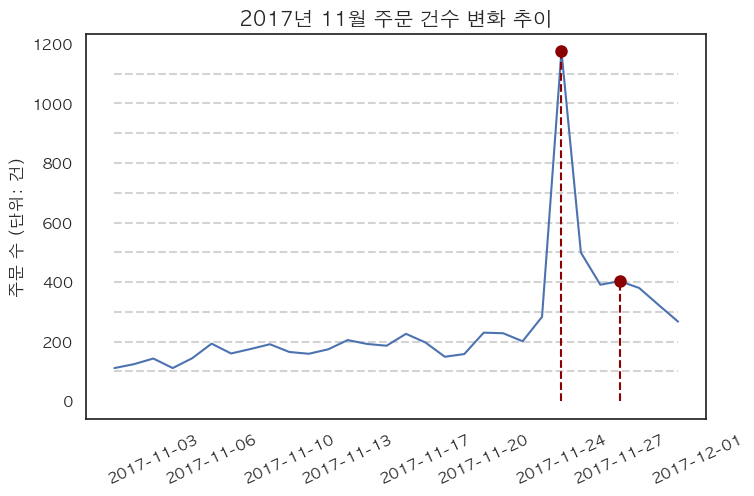

In [23]:
fig, ax = plt.subplots(figsize = (8, 5))

# backgrounds
for i in range(100, 1200, 100):
    ax.plot_date(cnt_orders_2017_11['order_purchase_date'], [i]*len(cnt_orders_2017_11['order_purchase_date']), color='lightgray', fmt = '--')
    
# main graph
cnt_orders_2017_11_lineplot = sns.lineplot(data=cnt_orders_2017_11, x ='order_purchase_date', y='cnt_orders')
cnt_orders_2017_11_lineplot.set_title('2017년 11월 주문 건수 변화 추이', fontdict={'size':'large'})
cnt_orders_2017_11_lineplot.set_xlabel('')
cnt_orders_2017_11_lineplot.set_ylabel('주문 수 (단위: 건)')

ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = (MO, FR)))
# ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = (FR)))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 25)
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# ax.plot_date(cnt_orders_2017_11['order_purchase_date'][23], cnt_orders_2017_11['cnt_orders'][23], color='darkred', fmt = '--')
plt.plot_date([cnt_orders_2017_11['order_purchase_date'][23]], [cnt_orders_2017_11['cnt_orders'][23]], fmt='o', color='darkred', markersize = 8)
plt.plot_date([cnt_orders_2017_11['order_purchase_date'][23], cnt_orders_2017_11['order_purchase_date'][23]], [0, cnt_orders_2017_11['cnt_orders'][23]], fmt='--', color='darkred')


plt.plot_date([cnt_orders_2017_11['order_purchase_date'][26]], [cnt_orders_2017_11['cnt_orders'][26]], fmt='o', color='darkred', markersize = 8)
plt.plot_date([cnt_orders_2017_11['order_purchase_date'][26], cnt_orders_2017_11['order_purchase_date'][26]], [0, cnt_orders_2017_11['cnt_orders'][26]], fmt='--', color='darkred')

# plt.scatter(x = cnt_orders_2017_11.iloc[10,0], y = cnt_orders_2017_11.iloc[10,1], color='darkred')
# plt.vlines(cnt_orders_2017_11.iloc[10,0], -10, cnt_orders_2017_11.iloc[10,1], linestyle='--', color ='darkred')
plt.show()


In [24]:
sales_2017_11 = pd.read_csv('../data/sales_2017_one_year.csv')
sales_2017_11['order_purchase_date'] = pd.to_datetime(sales_2017_11['order_purchase_date'], format = '%Y-%m-%d')
print(sales_2017_11.head())

  order_purchase_date  total_payments
0          2017-11-01        22702.16
1          2017-11-02        25017.16
2          2017-11-03        27058.52
3          2017-11-04        22294.81
4          2017-11-05        21752.57


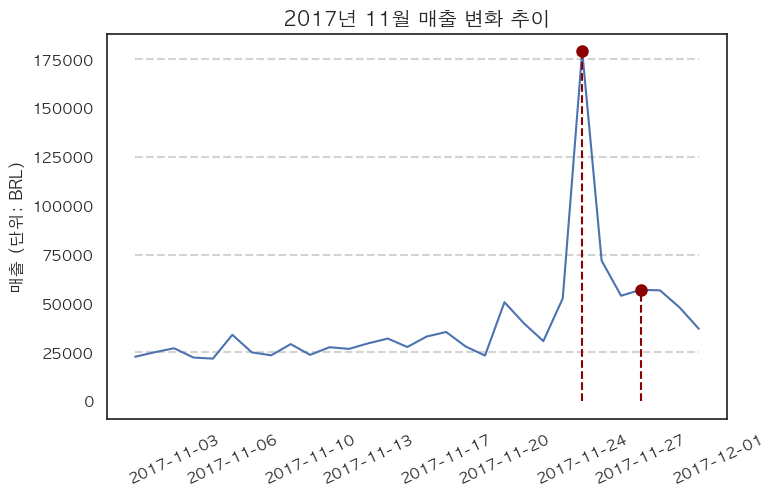

In [25]:
fig, ax = plt.subplots(figsize = (8, 5))

# backgrounds
for i in range(25000, 180000, 50000):
    ax.plot_date(cnt_orders_2017_11['order_purchase_date'], [i]*len(cnt_orders_2017_11['order_purchase_date']), color='lightgray', fmt = '--')
    
# main graph
sales_2017_11_lineplot = sns.lineplot(data=sales_2017_11, x ='order_purchase_date', y='total_payments')
sales_2017_11_lineplot.set_title('2017년 11월 매출 변화 추이', fontdict={'size':'large'})
sales_2017_11_lineplot.set_xlabel('')
sales_2017_11_lineplot.set_ylabel('매출 (단위: BRL)')

ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = (MO, FR)))
# ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = (FR)))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 25)
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# ax.plot_date(cnt_orders_2017_11['order_purchase_date'][23], cnt_orders_2017_11['cnt_orders'][23], color='darkred', fmt = '--')
plt.plot_date([sales_2017_11['order_purchase_date'][23]], [sales_2017_11['total_payments'][23]], fmt='o', color='darkred', markersize = 8)
plt.plot_date([sales_2017_11['order_purchase_date'][23], sales_2017_11['order_purchase_date'][23]], [0, sales_2017_11['total_payments'][23]], fmt='--', color='darkred')


plt.plot_date([sales_2017_11['order_purchase_date'][26]], [sales_2017_11['total_payments'][26]], fmt='o', color='darkred', markersize = 8)
plt.plot_date([sales_2017_11['order_purchase_date'][26], sales_2017_11['order_purchase_date'][26]], [0, sales_2017_11['total_payments'][26]], fmt='--', color='darkred')

# plt.scatter(x = cnt_orders_2017_11.iloc[10,0], y = cnt_orders_2017_11.iloc[10,1], color='darkred')
# plt.vlines(cnt_orders_2017_11.iloc[10,0], -10, cnt_orders_2017_11.iloc[10,1], linestyle='--', color ='darkred')
plt.show()
